# FINAL PROJECT 3 KAMPUS MERDEKA HACKTIV8
Nama Kelompok :
- Kezario Mohammad Anaqi (PYTN-KS04-005)
- Helmi Saifullah Mansur (PYTN-KS04-010)

## 1. Overview (Perkenalan)
#### **Latar Belakang**
Penyakit kardiovaskular (CVD) merupakan salah satu penyebab kematian nomor 1 secara global, dimana mengambil sekitar 17,9 juta jiwa setiap tahun, serta menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung yaitu kejadian umum yang disebabkan oleh CVD. Pada kumpulan dataset ini berisi 12 feature yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular (CVD) dapat dicegah dengan mengatasi atau mengurangi faktor risiko perilaku diantaranya penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular (CVD) atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model machine learning dapat sangat membantu.

#### **Dataset**
Dataset yang digunakan pada analisis ini yaitu heart failure clinical records yang diunduh dari kaggle melalui [link berikut](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

Dataset ini berisikan faktor-faktor kematian oleh gagal jantung yang memiliki 13 atribut dengan 299 rows. Atribut yang menjadi target yaitu atribut Death Event/Kematian, sedangkan atribut lainnya merupakan prediktor.

#### **Objective yang Ingin Dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Memahami konsep classification dengan **Ensemble Model** serta mempersiapkan data untuk digunakan dalam model **Ensemble Model**.

- Dapat mengimplementasikan **Ensemble Model** untuk membuat Prediksi keselamatan pasien dari penyakit jantung

- Mengetahui faktor-faktor yang berpengaruh signifikan dalam memPrediksi keselamatan pasien dari penyakit jantung. 

## 2. Import Pustaka yang Dibutuhkan
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

## 3. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

a. Melakukan loading data dengan menggunakan pandas

In [2]:
df = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

b. Melakukan setting untuk menampilkan semua kolom pada dataframe

In [3]:
pd.set_option("display.max_columns", None)

c. Melihat 5 baris teratas pada dataset

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


d. Melihat 5 baris terbawah dari dataset

In [5]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


e. melihat dimensi dataset

In [6]:
df.shape

(299, 13)

dapat dilihat dataset memiliki dimensi 13 kolom/atribut dan 299 baris

f. melihat informasi (kolom, baris, tipe data) pada dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


dapat dilihat dataset memiliki 13 atribut dengan tipe data float64 sebanyak 2, dan tipe data integer sebanyak 11.

g. Melihat rincian nama kolom pada dataset

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

h. Mengecek apakah pada dataset terdapat missing value

In [9]:
df.isnull().values.any()

False

output menunjukkan 'False' yang berarti pada dataset tidak terdapat missing value

i. Melihat statistik deskriptif dari masing-masing atribut

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Diketahui bahwa :
- Usia rata-rata pasien yakni berkisar 60 tahun
- Rata-rata nilai kreatinin fosfokinase pada pasien yaitu 581,84
- Fraksi ejeksi maksimal yang ada pada pasien yaitu 80
- Kreatinin serum minimal yang ada pada pasien yaitu 0,5
- Sodium serum rata-rata pada pasien yaitu 136,63

In [11]:
df.astype('category').describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,0,582,0,35,0,263358.03,1.0,136,1,0,250,0
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


Diketahui bahwa:
- Pasien yang tidak mengidap anemia yaitu 170 pasien
- Pasien yang tidak mengidap diabetes yaitu 174 pasien
- Pasien dengan tidak mengidap tekanan darah tinggi yaitu 194 pasien
- Pasien yang tidak merokok yakni 203 pasien
- Pasien yang tidak meninggal berjumlah 203 orang

j. Melihat banyaknya unique values pada masing-masing atribut

In [12]:
for col in df.columns:
    print(col,':', df[col].nunique())

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


k. Mencoba melihat unique values pada kolom ejection_fraction

In [13]:
df['ejection_fraction'].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

## 4. Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

a. Melihat apakah terdapat duplikasi data pada dataset

In [14]:
df.duplicated().sum()

0

dapat dilihat tidak ada duplikasi data pada dataset

b. Melihat apakah terdapat missing values / nilai yang hilang pada tiap kolom

In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

dari hasil diketahui tidak terdapat missing value pada beberapa kolom di dataset

c. Memberikan nama baru pada untuk setiap kolom atau atribut

In [16]:
df = df.rename(columns={'age':'Usia', 
                        'anaemia':'Anaemia', 
                        'creatinine_phosphokinase':'EnzimCPK', 
                        'diabetes':'Diabetes', 
                        'ejection_fraction':'PecahanEjeksi', 
                        'high_blood_pressure':'TekananDarahTinggi', 
                        'platelets':'Trombosit', 
                        'serum_creatinine':'KreatininSerum', 
                        'serum_sodium':'SodiumSerum', 
                        'sex':'JenisKelamin', 
                        'smoking':'Merokok', 
                        'time':'Waktu', 
                        'DEATH_EVENT':'Kematian'})

df.head()

,Usia,Anaemia,EnzimCPK,Diabetes,PecahanEjeksi,TekananDarahTinggi,Trombosit,KreatininSerum,SodiumSerum,JenisKelamin,Merokok,Waktu,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
df.columns

Index(['Usia', 'Anaemia', 'EnzimCPK', 'Diabetes', 'PecahanEjeksi',
       'TekananDarahTinggi', 'Trombosit', 'KreatininSerum', 'SodiumSerum',
       'JenisKelamin', 'Merokok', 'Waktu', 'Kematian'],
      dtype='object')

d. Melihat banyaknya nilai dari masing-masing atribut

In [18]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('\n','#'*60,'\n')

Usia : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: Usia, dtype: int64

 ############################################################ 

Anaemia : 
0    170
1    129
Name: Anaemia, dtype: int64

 ############################################################ 

EnzimCPK : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: EnzimCPK, Length: 208, dtype: 

## 5. Eksplorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

a. Melihat paling banyak umur pasien penyakit jantung yang banyak merokok

In [19]:
df.loc[df['Merokok'] == 1, 'Usia'].mode()

0    60.0
Name: Usia, dtype: float64

dari hasil diketahui bahwa pasien penyakit jantung yang merokok kebanyakan berusia 60 tahun

b. Melihat jumlah Trombosit	pasien penyakit jantung terbanyak dan terkecil

In [20]:
df['Trombosit'].agg(('min', 'max'))

min     25100.0
max    850000.0
Name: Trombosit, dtype: float64

dari hasil diketahui trombosit terkecil pasien yaitu 25100.0, dan trombosit terbanyak pasien yaitu 850000.0

c. Melihat proporsi data pada kolom Usia dan Kematian dengan menggunakan crosstab

In [21]:
pd.crosstab(df.Kematian, df.Usia)

Usia,40.000,41.000,42.000,43.000,44.000,45.000,46.000,47.000,48.000,49.000,50.000,51.000,52.000,53.000,54.000,55.000,56.000,57.000,58.000,59.000,60.000,60.667,61.000,62.000,63.000,64.000,65.000,66.000,67.000,68.000,69.000,70.000,72.000,73.000,75.000,77.000,78.000,79.000,80.000,81.000,82.000,85.000,86.000,87.000,90.000,94.000,95.000
Kematian,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,1,6,1,2,13,2,1,0,3,19,3,5,9,1,14,1,1,8,1,20,1,4,4,8,3,18,2,2,3,1,18,2,3,5,1,2,1,2,1,0,3,0,0,1,0,0
1,0,0,1,0,0,6,1,0,2,1,8,1,0,1,1,3,0,1,2,3,13,1,0,1,0,0,8,0,0,2,2,7,5,1,6,1,0,0,5,0,3,3,1,1,2,1,2


dari hasil diketahui banyak pasien berusia 60 tahun mengalami kematian ketika dilakukan follow up

d. Melakukan grouping pada atribut Usia dan Kematian untuk melihat rata-ratanya

In [22]:
df[['Usia','Kematian']].groupby('Kematian').mean().sort_values(by='Usia', ascending=True)

,Usia
Kematian,
0,58.761906
1,65.215281


Diperoleh bahwa rata-rata usia pasien yang meninggal yakni 65 tahun, sedangkan rata-rata pasien yang tidak meninggal/bertahan berusia 58 tahun

e. Melihat data histori record dengan melakukan query, yang di mana:
- Pasien berusia 50
- Pasien Perokok
- Pasien memiliki riwayat diabetes

In [23]:
df[
    (df['Usia'] == 50.0) &
    (df['Merokok'] == 1) &
    (df['Diabetes'] == 1) 
].head()

,Usia,Anaemia,EnzimCPK,Diabetes,PecahanEjeksi,TekananDarahTinggi,Trombosit,KreatininSerum,SodiumSerum,JenisKelamin,Merokok,Waktu,Kematian
41,50.0,0,124,1,30,1,153000.00,1.20,136,0,1,32,1
45,50.0,0,582,1,38,0,310000.00,1.90,135,1,1,35,1
153,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0


f. Visualisasi line plot korelasi antara Usia dengan Waktu.

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


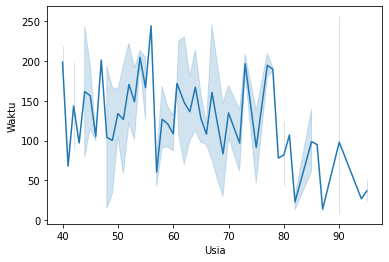

In [24]:
sns.lineplot('Usia', 'Waktu', data=df)
plt.show()

Dapat disimpulkan bahwa usia tidak sebanding atau tidak ada pola khusus correlation dengan Waktu

g. Melihat persebaran data pada atribut TekananDarahTinggi

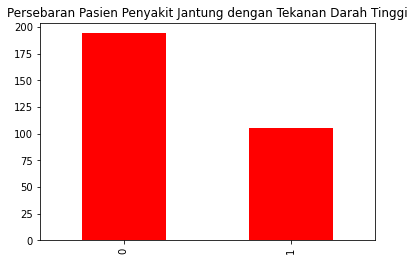

In [25]:
df['TekananDarahTinggi'].value_counts().plot.bar(color='red')
plt.title('Persebaran Pasien Penyakit Jantung dengan Tekanan Darah Tinggi')
plt.show()

dapat dilihat pasien Penyakit Jantung dengan Tekanan Darah Tinggi hanya sekitar lebih dari 100 orang saja dan yang tidak Penyakit Jantung dengan Tekanan Darah Tinggi lebih banyak.

h. Melihat banyaknya persebaran jumlah kematian pasien berdasarkan umur dan jenis kelamin

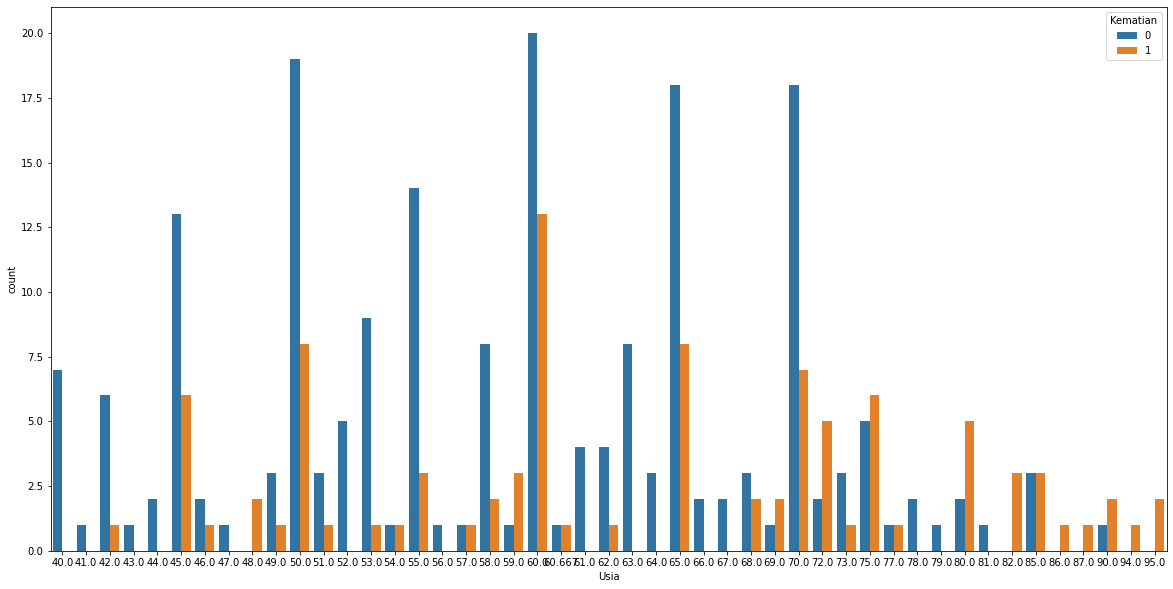

In [26]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Usia", hue="Kematian", data=df)

dapat dilihat bahwa persebaran kematian tertinggi ada pada usia 60 tahun dan persebaran kematian yang memiliki nilai hampir setara atau sama ada pada usia 54 tahun, 57 tahun, 66 tahun, dan 77 tahun.

i. Visualisasi pie chart 10 Usia pasien terbawah dengan rata- rata riwayat SodiumSerum rendah

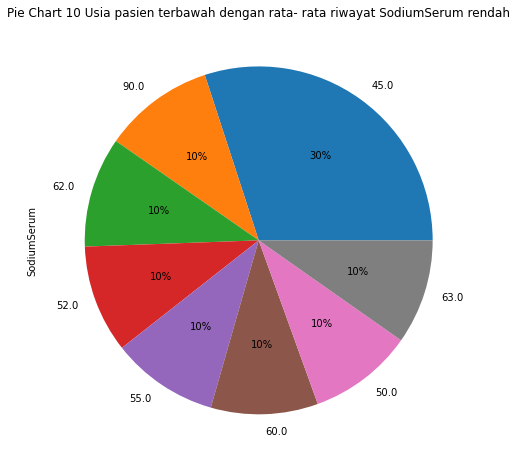

In [27]:
df_last10 = df.tail(10)
df_area = df_last10.groupby(['Usia']).sum()['SodiumSerum'].sort_values(ascending=False)
df_area.plot(kind='pie', figsize=(22,8), autopct='%1.0f%%')

plt.title("Pie Chart 10 Usia pasien terbawah dengan rata- rata riwayat SodiumSerum rendah")
plt.show()

dari visualisasi didapatkan usia 63, 50, 60, 55, 52, 62 dan 90 tahun memiliki rata- rata riwayat SodiumSerum rendah yaitu 10% dan disusul usia 45 tahun dengan rata- rata riwayat SodiumSerum 30%

j. Visualisasi boxplot perbandingan Tekanan Darah Tinggi berdasarkan Pecahan Ejeksi

Text(0.5, 1.0, 'Tekanan Darah Tinggi vs Pecahan Ejeksi')

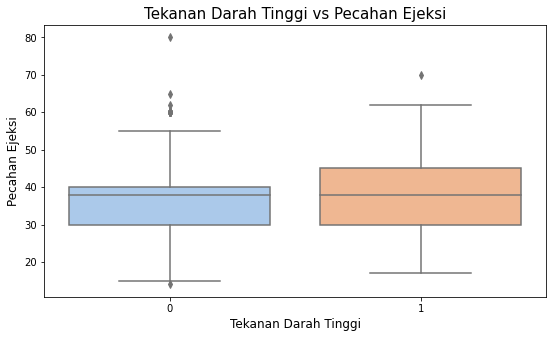

In [28]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='TekananDarahTinggi', y='PecahanEjeksi', data=df, palette="pastel")

plt.xlabel("Tekanan Darah Tinggi", fontsize= 12)
plt.ylabel("Pecahan Ejeksi", fontsize= 12)
plt.title("Tekanan Darah Tinggi vs Pecahan Ejeksi", fontsize= 15)

Pada grafik Boxplot terlihat bahwa 0 atau tidak memiliki riwayat tekanan darah tinggi memiliki jangkauan yang cukup jauh dengan 1 atau memiliki riwayat tekanan darah tinggi serta outlier 0 atau tidak memiliki riwayat tekanan darah tinggi juga lebih banyak daripada 1 atau memiliki riwayat tekanan darah tinggi.

k. Melakukan visualisasi korelasi antar variabel untuk melihat hubungan

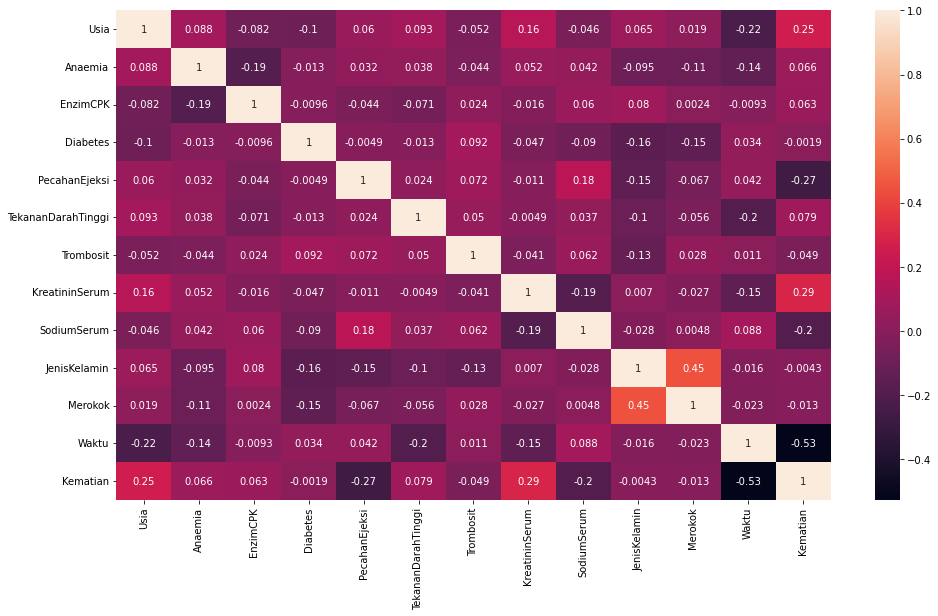

In [29]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

Berdasarkan visualisasi heatmap di atas, dapat disimpulkan bahwa:
- `Merokok` dan `JenisKelamin` memiliki korelasi tinggi yaitu 0.45
- `Waktu` memiliki korelasi rendah dengan `Kematian` yaitu -0.53
- `KreatininSerum` memiliki korelasi tinggi dengan `Kematian` dengan nilai 0.29
- `Usia` juga memiliki korelasi tinggi dengan `Kematian` dengan nilai 0.25

## 6. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

a. Melakukan inisialisasi variabel X dan y

Disini kami mendefinisikan untuk variabel X nya yaitu kolom selain `Kematian`, sedangkan untuk variabel y yaitu `Kematian`

In [30]:
X = df.drop(['Kematian'], axis=1)
y = df['Kematian']

print(X.shape)
print(y.shape)

(299, 12)
(299,)


b. Melakukan feature selection menggunakan library F regression dengan k=12

In [31]:
topFeatures = SelectKBest(f_regression, k=12)
fit = topFeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 12 Features yang Berpengaruh")
print(featureScores.nlargest(12, 'Score'))

Top 12 Features yang Berpengaruh
              Features       Score
11               Waktu  114.181264
7       KreatininSerum   28.158492
4        PecahanEjeksi   23.094063
0                 Usia   20.435946
8          SodiumSerum   11.765331
5   TekananDarahTinggi    1.881937
1              Anaemia    1.310096
2             EnzimCPK    1.173259
6            Trombosit    0.718880
10             Merokok    0.047333
9         JenisKelamin    0.005534
3             Diabetes    0.001121


dengan menggunakan library F regression juga didapatkan bahwa 12 feature yang paling berpengaruh dalam model yaitu `Waktu`, `KreatininSerum`, `PecahanEjeksi`, `Usia`, `SodiumSerum`, `TekananDarahTinggi`, `Anaemia `, `EnzimCPK`, `Trombosit`, `Merokok`, `JenisKelamin`, dan `Diabetes`

c. Memasukkan hasil dari feature seletion ke dalam variabel X_fit untuk selanjutnya dilakukan pemodelan

In [32]:
X_fit = df[['Waktu', 'KreatininSerum', 'PecahanEjeksi', 'Usia', 'SodiumSerum', 'TekananDarahTinggi', 'Anaemia', 'EnzimCPK', 
            'Trombosit', 'Merokok', 'JenisKelamin', 'Diabetes']]

d. Melihat 5 baris teratas dataframe X_fit

In [33]:
X_fit.head()

,Waktu,KreatininSerum,PecahanEjeksi,Usia,SodiumSerum,TekananDarahTinggi,Anaemia,EnzimCPK,Trombosit,Merokok,JenisKelamin,Diabetes
0,4,1.9,20,75.0,130,1,0,582,265000.00,0,1,0
1,6,1.1,38,55.0,136,0,0,7861,263358.03,0,1,0
2,7,1.3,20,65.0,129,0,0,146,162000.00,1,1,0
3,7,1.9,20,50.0,137,0,1,111,210000.00,0,1,0
4,8,2.7,20,65.0,116,0,1,160,327000.00,0,0,1


e. melihat informasi (kolom, baris, tipe data) dan dimensi pada dataframe X_fit

In [34]:
X_fit.info()

X_fit.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Waktu               299 non-null    int64  
 1   KreatininSerum      299 non-null    float64
 2   PecahanEjeksi       299 non-null    int64  
 3   Usia                299 non-null    float64
 4   SodiumSerum         299 non-null    int64  
 5   TekananDarahTinggi  299 non-null    int64  
 6   Anaemia             299 non-null    int64  
 7   EnzimCPK            299 non-null    int64  
 8   Trombosit           299 non-null    float64
 9   Merokok             299 non-null    int64  
 10  JenisKelamin        299 non-null    int64  
 11  Diabetes            299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


(299, 12)

f. Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.20, random_state=13)

In [36]:
print(X_train.shape)
print(X_test.shape)

(239, 12)
(60, 12)


Berdasarkan pembagian proporsi training data/data latih dan testing data/data uji, didapatkan jumlah **data training dari keseluruhan data sebanyak 239 data**, serta **data testing sebanyak 60 data**.

##  7. Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. seperti penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Pada kasus ini kami menggunakan **model Random Forest Classifier** dan **model Random Forest Regressor** yang merupakan ensemble method (berdasarkan pendekatan divide-and-conquer) dari decision tree yang dihasilkan pada dataset yang dipisahkan secara acak. Alasan penggunaan metode ini yaitu tipe data prediksi yang berupa data kategorik, sehingga metode tersebut cocok digunakan.

a. Model random forest classifier dengan GAUSSIAN CLASSIFIER n estimator 100

In [37]:
clf = RandomForestClassifier(n_estimators=100)

n_estimators is the number of trees to be used in the forest. Since Random Forest is an ensemble method comprising of creating multiple decision trees, this parameter is used to control the number of trees to be used in the process.

b. Model random forest Regressor dengan GAUSSIAN CLASSIFIER n estimator 100

In [38]:
clf1 = RandomForestRegressor(n_estimators=100)

## 8. Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

**a. Model Random Forest Classifier**

In [39]:
RFC = clf.fit(X_train, y_train)
RFC

RandomForestClassifier()

**b. Model Random Forest Regressor**

In [40]:
RFR = clf1.fit(X_train, y_train)
RFR

RandomForestRegressor()

## 9. Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

**a. Model Logistic Regression**
- memeriksa performa dengan .prdict_proba() yang mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol / satu

In [41]:
RFC.predict_proba(X_test)

array([[0.94, 0.06],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.66, 0.34],
       [0.06, 0.94],
       [0.37, 0.63],
       [0.44, 0.56],
       [0.28, 0.72],
       [0.33, 0.67],
       [1.  , 0.  ],
       [0.66, 0.34],
       [0.84, 0.16],
       [0.36, 0.64],
       [0.43, 0.57],
       [0.36, 0.64],
       [0.9 , 0.1 ],
       [0.81, 0.19],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.81, 0.19],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.85, 0.15],
       [0.13, 0.87],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.45, 0.55],
       [0.92, 0.08],
       [0.9 , 0.1 ],
       [0.32, 0.68],
       [0.53, 0.47],
       [0.96, 0.04],
       [0.85, 0.15],
       [0.5 , 0.5 ],
       [0.3 , 0.7 ],
       [0.89, 0.11],
       [0.67, 0.33],
       [0.54, 0.46],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.52, 0.48],
       [0.93, 0.07],
       [0.95, 0.05],
       [0.2 , 0.8 ],
       [0.98, 0.02],
       [0.41,

- melihat predicted outputs dengan .predict()

In [42]:
y_pred = RFC.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

- melihat nilai akurasi dengan .score

In [43]:
print("Test score:", RFC.score(X_test, y_test))
print("Train score:", RFC.score(X_train, y_train))

Test score: 0.9166666666666666
Train score: 1.0


didapatkan hasil nilai Score untuk test data / pengujian data yaitu 92% (0.916), sedangkan jika dibandingkan dengan train data /pelatihan data nilai scorenya 100% (1.0)

- Melihat confussion matrix dan classification report dari model

In [44]:
confusion_matrix(y_test, y_pred)

array([[40,  2],
       [ 3, 15]], dtype=int64)

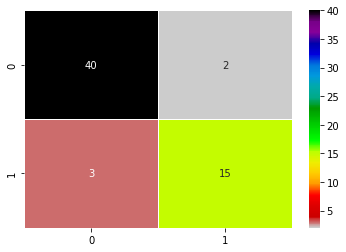

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.88      0.83      0.86        18

    accuracy                           0.92        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



In [45]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'nipy_spectral_r')
plt.show()
print(classification_report(y_test, y_pred))

berdasarkan hasil confusion matrix diketahui banyaknya nilai TP (True Positive) adalah 40, FP (False Positive) adalah 2, FN (False Negative) adalah 3, dan TN (True Negative) adalah 15

- Melihat summary dari evaluasi model Logistic Regression

In [46]:
print('Ringkasan Evaluasi Model Random Forest Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred))
print('Presisi :', precision_score(y_test,y_pred))
print('Recall :', recall_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))

Ringkasan Evaluasi Model Random Forest Classifier
Akurasi : 0.9166666666666666
Presisi : 0.8823529411764706
Recall : 0.8333333333333334
F1 Score : 0.8571428571428571


Dari Evaluasi model diketahui bahwa hasil akurasi model random forest classifier yaitu 92% (0.916) yang artinya hasil sudah baik dan bisa dibilang akurat sehingga model ini bisa digunakan untuk dilakukan prediksi keselamatan pasien dari penyakit jantung.

**b. Model Random Forest Regressor**

- melihat predicted outputs dengan .predict()

In [47]:
y_pred_reg = RFR.predict(X_test)
y_pred_reg

array([0.  , 0.  , 0.08, 0.2 , 1.  , 0.54, 0.41, 0.66, 0.86, 0.  , 0.51,
       0.16, 0.77, 0.78, 0.75, 0.02, 0.12, 0.01, 0.06, 0.12, 0.1 , 0.  ,
       0.04, 0.94, 0.  , 0.02, 0.06, 0.6 , 0.  , 0.07, 0.82, 0.19, 0.  ,
       0.05, 0.24, 0.9 , 0.1 , 0.55, 0.47, 0.  , 0.  , 0.  , 0.58, 0.01,
       0.  , 0.95, 0.  , 0.61, 0.01, 0.12, 0.51, 0.  , 0.03, 0.07, 0.16,
       0.73, 0.01, 0.7 , 0.12, 0.76])

- melihat nilai akurasi dengan .score

In [48]:
print("Test score:", RFR.score(X_test, y_test))
print("Train score:", RFR.score(X_train, y_train))

Test score: 0.5244523809523808
Train score: 0.9133144449753146


didapatkan hasil nilai Score untuk test data / pengujian data yaitu 54% (0.54), sedangkan jika dibandingkan dengan train data /pelatihan data nilai scorenya 92% (0.915)

- Melihat confussion matrix dan classification report dari model

In [49]:
y_pred_reg_round = y_pred_reg.round()
confusion_matrix(y_test, y_pred_reg_round)

array([[36,  6],
       [ 4, 14]], dtype=int64)

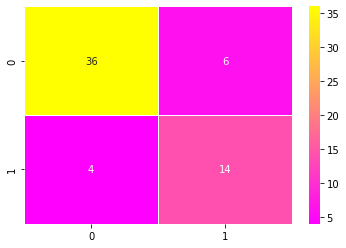

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.70      0.78      0.74        18

    accuracy                           0.83        60
   macro avg       0.80      0.82      0.81        60
weighted avg       0.84      0.83      0.84        60



In [50]:
cm_reg = confusion_matrix(y_test, y_pred_reg_round)
sns.heatmap(cm_reg, annot=True, fmt="d", linewidths=.5, cmap = 'spring')
plt.show()
print(classification_report(y_test, y_pred_reg_round))

berdasarkan hasil confusion matrix diketahui banyaknya nilai TP (True Positive) adalah 38, FP (False Positive) adalah 4, FN (False Negative) adalah 3, dan TN (True Negative) adalah 15

- Melihat summary dari evaluasi model Logistic Regression

In [51]:
print('Ringkasan Evaluasi Model Random Forest Regressor')
print('Akurasi :', accuracy_score(y_test, y_pred_reg_round))
print('Presisi :', precision_score(y_test,y_pred_reg_round))
print('Recall :', recall_score(y_test,y_pred_reg_round))
print('F1 Score :', f1_score(y_test,y_pred_reg_round))

Ringkasan Evaluasi Model Random Forest Regressor
Akurasi : 0.8333333333333334
Presisi : 0.7
Recall : 0.7777777777777778
F1 Score : 0.7368421052631577


Dari Evaluasi model diketahui bahwa hasil akurasi model random forest regressor yaitu 88% (0.88) yang artinya hasil sudah baik dan bisa dibilang akurat sehingga model ini bisa digunakan untuk dilakukan prediksi keselamatan pasien dari penyakit jantung.

**KESIMPULAN :**

Hasil akurasi dengan menggunakan 2 model ensemble method diantaranya Random Forest Classifier dengan nilai akurasi 92% dan Random Forest Regressor dengan nilai akurasi 88% sama-sama baik dan bisa digunakan untuk dilakukan prediksi keselamatan pasien dari penyakit jantung. Sehingga pada tahap selanjutnya kami akan menggunakan kedua model tersebut dan pada hasil prediksi akan diberikan output hasil prediksi dengan 2 model tersebut

## 10. Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

**Petunjuk Pengisian :**
- Usia (float) Range 40 tahun - 95 tahun (format: tahun.bulan)
- Untuk kolom Usia, Trombosit, dan Kreatinin Serum silahkan masukkan sesuai dengan data yang ingin di prediksi dengan bertipe data float

In [52]:
print('--- PREDIKSI KESELAMATAN PASIEN DARI PENYAKIT JANTUNG MENGGUNAKAN RANDOM FOREST ---')
print('='*100)

usia = float(input("Usia (Range 40.0 - 95.0) (format: tahun.bulan) : "))
anaemia = input("Apakah pasien mempunyai anemia? (Yes/No): : ")
enzim = int(input("Level Creatinine Phosphokinase : "))
diabetes = input("Apakah pasien mempunyai riwayat diabetes? (Yes/No) : ")
ejeksi = int(input("Banyak Darah Keluar Jantung (Pecahan Ejeksi) : "))
DarahTinggi = input("Apakah pasien mempunyai darah tinggi? (Yes/No): : ")
trombosit = float(input("Jumlah platelet (trombosit) pasien : "))
kreatinin = float(input("Level serum creatinine dalam darah : "))
sodium = int(input("Level serum sodium dalam darah : "))
JenisKelamin= input("Jenis Kelamin (Male/Female): ")
rokok = input("Apakah pasien merokok? (Yes/No) : ")
waktu = int(input("Hari sebelum follow-up berikutnya: : "))

val = [usia, enzim , ejeksi, trombosit, kreatinin, sodium, waktu]

anae = {'No':0, 'Yes': 1}

for i in range(0,2):
    if anae[anaemia]==i:
        val.append(1.0)
    else:
        next
        
diabet = {'No':0, 'Yes': 1}

for i in range(0,2):
    if diabet[diabetes]==i:
        val.append(1.0)
    else:
        next
        
darah = {'No':0, 'Yes': 1}

for i in range(0,2):
    if darah[DarahTinggi]==i:
        val.append(1.0)
    else:
        next
        
kelamin = {'Female':0, 'Male': 1}

for i in range(0,2):
    if kelamin[JenisKelamin]==i:
        val.append(1.0)
    else:
        next
        
smoke = {'No':0, 'Yes': 1}

for i in range(0,2):
    if smoke[rokok]==i:
        val.append(1.0)
    else:
        next
        
print(val)

predict_rfc = RFC.predict([val])
predict_reg = RFR.predict([val])

if (predict_rfc == 0): 
    print("Berdasarkan prediksi Random Forest Classifier yaitu pasien belum meninggal sebelum follow up berikutnya")
else: 
    print("Berdasarkan prediksi Random Forest Classifier pasien telah meninggal sebelum follow up berikutnya.")
    
if (predict_reg == 0): 
    print("Berdasarkan prediksi Random Forest Regressor yaitu pasien belum meninggal sebelum follow up berikutnya")
else: 
    print("Berdasarkan prediksi Random Forest Regressor yaitu pasien telah meninggal sebelum follow up berikutnya.")

--- PREDIKSI KESELAMATAN PASIEN DARI PENYAKIT JANTUNG MENGGUNAKAN RANDOM FOREST ---
Usia (Range 40.0 - 95.0) (format: tahun.bulan) : 60
Apakah pasien mempunyai anemia? (Yes/No): : No
Level Creatinine Phosphokinase : 522
Apakah pasien mempunyai riwayat diabetes? (Yes/No) : No
Banyak Darah Keluar Jantung (Pecahan Ejeksi) : 20
Apakah pasien mempunyai darah tinggi? (Yes/No): : Yes
Jumlah platelet (trombosit) pasien : 232000
Level serum creatinine dalam darah : 1.9
Level serum sodium dalam darah : 130
Jenis Kelamin (Male/Female): Male
Apakah pasien merokok? (Yes/No) : Yes
Hari sebelum follow-up berikutnya: : 4
[60.0, 522, 20, 232000.0, 1.9, 130, 4, 1.0, 1.0, 1.0, 1.0, 1.0]


D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Berdasarkan prediksi Random Forest Classifier pasien telah meninggal sebelum follow up berikutnya.
Berdasarkan prediksi Random Forest Regressor yaitu pasien telah meninggal sebelum follow up berikutnya.


Pada percobaan prediksi diatas kami mencoba memasukkan inputan Usia 60 tahun, Tidak memiliki riwayat Anaemia, Enzim CPK 522, tidak memiliki riwayat Diabetes, Pecahan Ejeksi 20, Memiliki riwayat Tekanan Darah Tinggi, Trombosit 232000.0 Kreatinin Serum 1.9, Sodium Serum 130, Pasien Laki - laki, Pasien perokok, dan Waktu dalam hari untuk follow-up yaitu 4

Dengan inputan tersebut didapatkan hasil prediksi menggunakan metode Random Forest Classifier dan Random Forest Regressor yaitu **pasien telah meninggal sebelum follow up berikutnya**

*Kode program juga bisa di run lagi dan diisi dengan data yang diinginkan.*

### Save and Finalize Model
disini kami menggunakan operasi Pickle untuk menyimpan format serialized ke sebuah file dan menggunakannya untuk membuat prediksi baru

In [53]:
pickle.dump(RFC, open('model_RFC_FP3.pkl', 'wb'))
pickle.dump(RFR, open('model_RRF_FP3.pkl', 'wb'))

## 11. Pengambilan Kesimpulan

Dari analisis yang telah kami lakukan, diperoleh kesimpulan sebagai berikut:
- Pada Dataset terdapat 13 atribut yang diperkirakan sebagai faktor yang memprediksi keselamatan pasien dari penyakit jantung, Namun setelah dilakukan analisis kami menyimpulkan bahwa semua atribut  menjadi faktor kuat yang memprediksi keselamatan pasien dari penyakit jantung dengan atribut `Kematian` sebagai target dan atribut `Waktu`, `KreatininSerum`, `PecahanEjeksi`, `Usia`, `SodiumSerum`, `TekananDarahTinggi`, `Anaemia `, `EnzimCPK`, `Trombosit`, `Merokok`, `JenisKelamin`, dan `Diabetes` sebagai faktor yang memprediksi keselamatan pasien dari penyakit jantung
- Pada datset ini tidak terdapat adanya misssing value pada setiap aytibutnya
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan lineplot, boxplot, histogram, pie chart, dan matriks korelasi (heatmap) dan juga kamimelakukan beberapa contoh groupby dan query terhadap data yang ada
- Pada analisis ini variabel dependen atau target yang digunakan yaitu `Kematian` dan variabel independen yang digunakan yaitu `Waktu`, `KreatininSerum`, `PecahanEjeksi`, `Usia`, `SodiumSerum`, `TekananDarahTinggi`, `Anaemia `, `EnzimCPK`, `Trombosit`, `Merokok`, `JenisKelamin`, dan `Diabetes`
- Pada proses feature selection kami menggunakan library F regression yang memberikan score pada setiap atribut
- Pada analisis ini kami membagi data menjadi Training dan Testing dengan proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)
- Pada project ini kami menggunakan model ensemble method yaitu Random Forest Classifier dan Random Forest Regressor
- Untuk model Random Forest Classifier didapatkan nilai Akurasi sebesar 92% (0.916), nilai Presisi sebesar 88% (0.88), nilai Recall sebesar 83% (0.83), dan nilai F1 Score sebesar 86% (0.857)
- Untuk model Random Forest Regressor didapatkan nilai Akurasi sebesar 88% (0.88), nilai Presisi sebesar 79% (0.789), nilai Recall sebesar 83% (0.83), dan nilai F1 Score sebesar 81% (0.81)
- Hasil akurasi dengan menggunakan 2 model ensemble method diantaranya Random Forest Classifier dengan nilai akurasi 92% dan Random Forest Regressor dengan nilai akurasi 88% sama-sama baik dan bisa digunakan untuk dilakukan prediksi keselamatan pasien dari penyakit jantung.
- Pada tahap selanjutnya kami akan menggunakan kedua model tersebut dan pada hasil prediksi akan diberikan output hasil prediksi dengan 2 model tersebut